In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Paso 1: Generación de Datos

In [2]:
# Generar datos sintéticos para clasificación binaria
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.03,
    random_state=42
)

Visualizar los datos

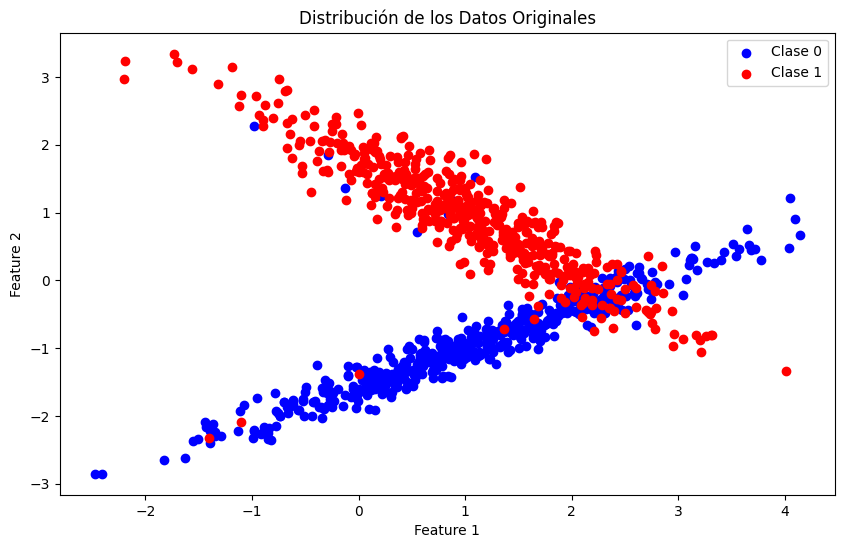

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
plt.title('Distribución de los Datos Originales')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Paso 2: Preprocesamiento de Datos

In [5]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Añadir término de intercepción (bias)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

Paso 3: Implementación de Regresión Logística

In [6]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.cost_history = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        # Inicializar pesos
        self.weights = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            # Propagación
            z = np.dot(X, self.weights)
            h = self._sigmoid(z)

            # Cálculo de costo
            cost = self._compute_cost(h, y)
            self.cost_history.append(cost)

            # Actualización de pesos (descenso de gradiente)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.weights -= self.learning_rate * gradient

        return self

    def predict_proba(self, X):
        return self._sigmoid(np.dot(X, self.weights))

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

Paso 4: Entrenamiento del Modelo

In [7]:
# Instanciar y entrenar modelo
model = LogisticRegression(learning_rate=0.1, n_iterations=3000)
model.fit(X_train, y_train)

Visualizar curva de aprendizaje

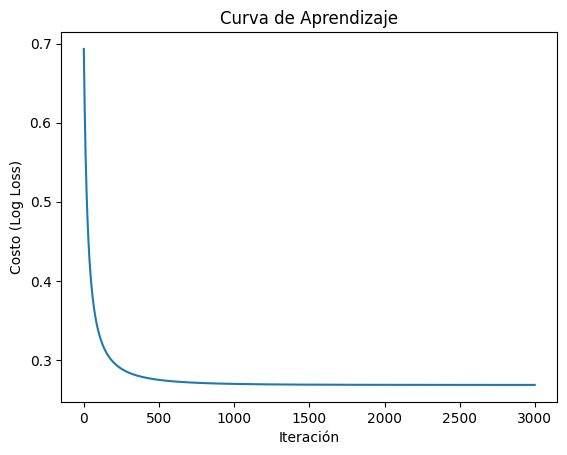

In [8]:
plt.plot(model.cost_history)
plt.title('Curva de Aprendizaje')
plt.xlabel('Iteración')
plt.ylabel('Costo (Log Loss)')
plt.show()

Paso 5: Evaluación del Modelo

In [9]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report,
                             roc_auc_score)

# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Métricas
print(f'Exactitud: {accuracy_score(y_test, y_pred):.4f}')
print(f'AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}')
print('\nMatriz de Confusión:')
print(confusion_matrix(y_test, y_pred))
print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.8500
AUC-ROC: 0.9095

Matriz de Confusión:
[[88  9]
 [21 82]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        97
           1       0.90      0.80      0.85       103

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



Paso 6: Visualización de Frontera de Decisión

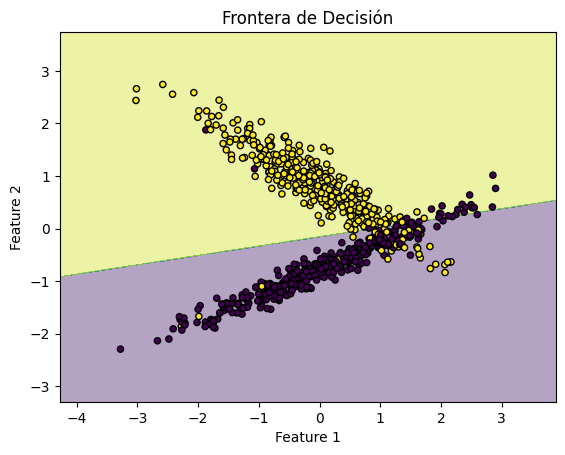

In [10]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[np.ones((xx.ravel().shape[0], 1)),
                           xx.ravel(),
                           yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:,1], X[:,2], c=y, s=20, edgecolor='k')
    plt.title('Frontera de Decisión')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_decision_boundary(X_train, y_train, model)

Modifica la tasa de aprendizaje y observa su efecto en la convergencia

Tasa de aprendizaje = 0.01, Exactitud = 0.8500
Tasa de aprendizaje = 0.2, Exactitud = 0.8500
Tasa de aprendizaje = 0.4, Exactitud = 0.8500
Tasa de aprendizaje = 0.6, Exactitud = 0.8500
Tasa de aprendizaje = 0.8, Exactitud = 0.8500
Tasa de aprendizaje = 1.0, Exactitud = 0.8500


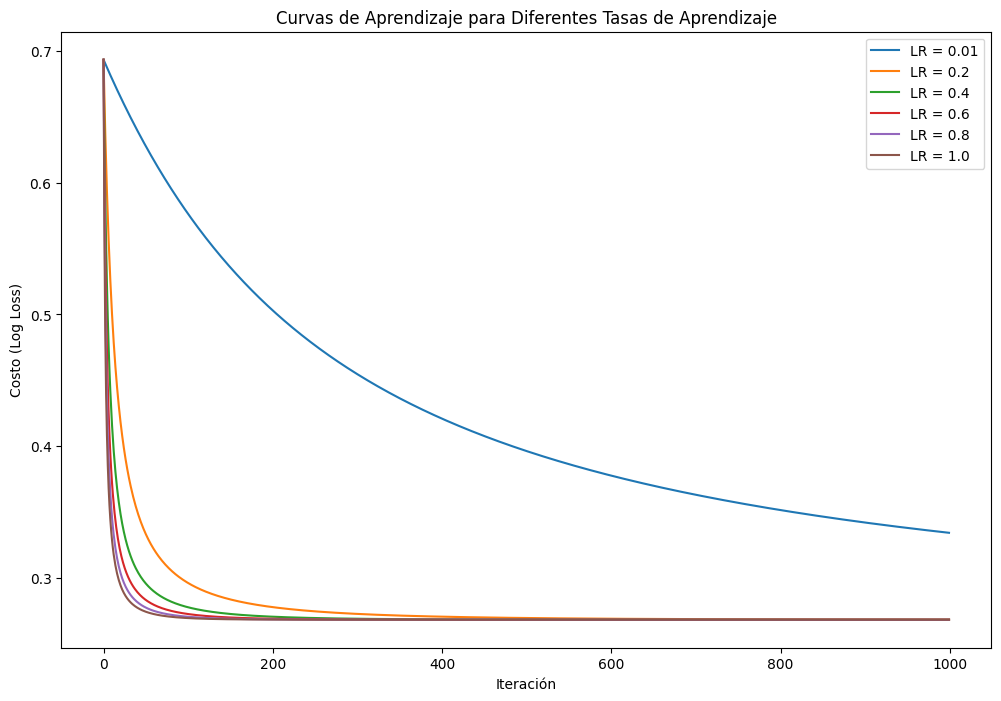

In [ ]:
# Dividir en entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar características
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Añadir término de intercepción (bias)
X_train2 = np.c_[np.ones((X_train2.shape[0], 1)), X_train2]
X_test2 = np.c_[np.ones((X_test2.shape[0], 1)), X_test2]

learning_rates = [0.01, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    model2 = LogisticRegression(learning_rate=lr, n_iterations=1000)
    model2.fit(X_train2, y_train2)
    
    plt.plot(model2.cost_history, label=f'LR = {lr}')
    
    y_pred1 = model2.predict(X_test2)
    accuracy = accuracy_score(y_test2, y_pred1)

plt.title('Curvas de Aprendizaje para Diferentes Tasas de Aprendizaje')
plt.xlabel('Iteración')
plt.ylabel('Costo (Log Loss)')
plt.legend()
plt.show()

- Las tasas más altas (0.4-1.0) convergen más rápidamente (primeras 100 iteraciones)

- La tasa más baja (0.01) converge de manera más suave pero requiere más iteraciones

Desactiva la normalización de los datos (`StandardScaler`) y evalúa cómo afecta al rendimiento del modelo. ¿Por qué es importante normalizar los datos para la regresión logística?

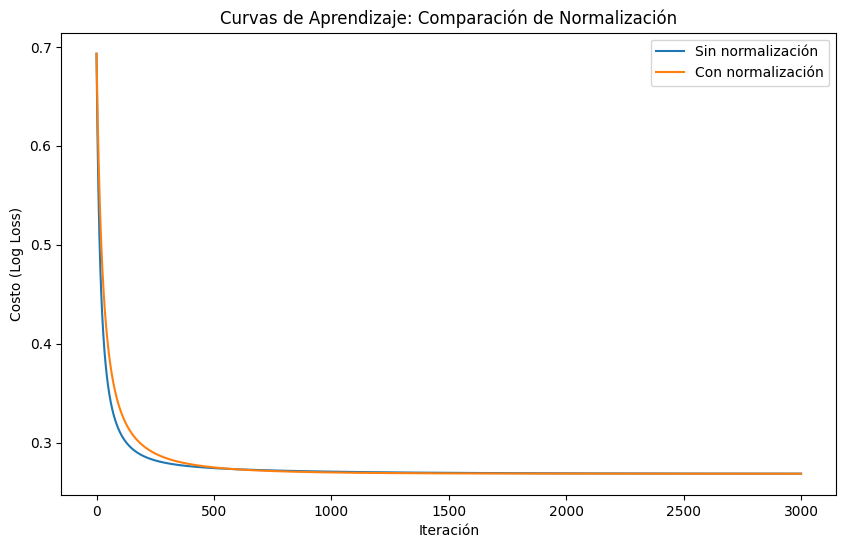

In [22]:
# Dividir en entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Versión sin normalización
X_train3 = np.c_[np.ones((X_train3.shape[0], 1)), X_train3]
X_test3 = np.c_[np.ones((X_test3.shape[0], 1)), X_test3]

# Versión con normalización
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train3)
X_test_norm = scaler.transform(X_test3)

X_train_norm = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_norm = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

# Entrenamiento y evaluación de ambos modelos
model = LogisticRegression(learning_rate=0.1, n_iterations=3000)
model.fit(X_train3, y_train3)

y_pred_raw = model.predict(X_test3)

model_norm = LogisticRegression(learning_rate=0.1, n_iterations=3000)
model_norm.fit(X_train_norm, y_train3)

y_pred_norm = model_norm.predict(X_test_norm)

# Visualizar curvas de aprendizaje
plt.figure(figsize=(10,6))
plt.plot(model.cost_history, label='Sin normalización')
plt.plot(model_norm.cost_history, label='Con normalización')
plt.title('Curvas de Aprendizaje: Comparación de Normalización')
plt.xlabel('Iteración')
plt.ylabel('Costo (Log Loss)')
plt.legend()
plt.show()

Sin normalización:

- Alcanza un costo más bajo en las primeras iteraciones

- Converge más rápido inicialmente

Con normalización:

- Toma más iteraciones para alcanzar la convergencia

- Tiene un comportamiento más suave

Cambia el número de iteraciones (`n_iterations`) y la tasa de aprendizaje (`learning_rate`). ¿Qué ocurre si el modelo tiene demasiadas iteraciones o una tasa de aprendizaje muy alta/baja? Grafica la curva de aprendizaje en diferentes configuraciones.

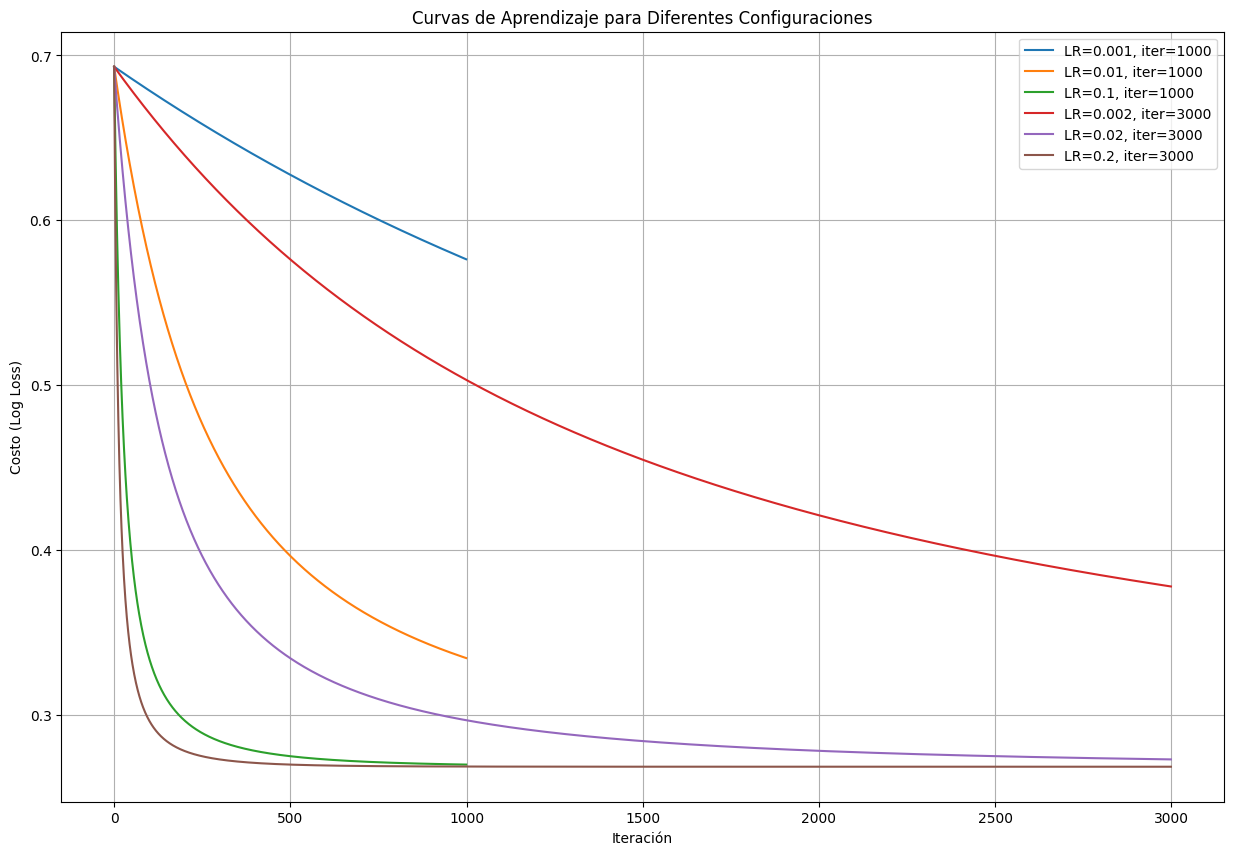

In [41]:
# Dividir en entrenamiento y prueba
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar características
scaler2 = StandardScaler()
X_train4 = scaler2.fit_transform(X_train4)
X_test4 = scaler2.transform(X_test4)

# Añadir término de intercepción (bias)
X_train4 = np.c_[np.ones((X_train4.shape[0], 1)), X_train4]
X_test4 = np.c_[np.ones((X_test4.shape[0], 1)), X_test4]

configurations = [
    {'lr': 0.001, 'iter': 1000},  
    {'lr': 0.01, 'iter': 1000},  
    {'lr': 0.1, 'iter': 1000}, 
    {'lr': 0.002, 'iter': 3000}, 
    {'lr': 0.02, 'iter': 3000},   
    {'lr': 0.2, 'iter': 3000}
]

plt.figure(figsize=(15, 10))

for config in configurations:
    model4 = LogisticRegression(learning_rate=config['lr'], n_iterations=config['iter'])
    model4.fit(X_train4, y_train4)
    
    plt.plot(model4.cost_history, 
             label=f'LR={config["lr"]}, iter={config["iter"]}')
    
    y_pred = model4.predict(X_test4)
    accuracy = accuracy_score(y_test4, y_pred)

plt.title('Curvas de Aprendizaje para Diferentes Configuraciones')
plt.xlabel('Iteración')
plt.ylabel('Costo (Log Loss)')
plt.legend()
plt.grid(True)
plt.show()

- Las configuraciones con 1000 iteraciones son suficientes para las tasas de aprendizaje altas

- Para tasas bajas (0.001, 0.002), incluso 3000 iteraciones no son suficientes para una convergencia completa

- Todas las configuraciones (excepto las de tasa muy baja) convergen eventualmente a un costo cercano a 0.28

- Las tasas más altas (0.1, 0.2) alcanzan este punto en aproximadamente 500 iteraciones

- Las tasas medias necesitan mas de 2000 iteraciones

- Las tasas bajas no llegan a converger en el número dado de iteraciones

Modifica el umbral de decisión en la función `predict` (por ejemplo, cambia `threshold=0.5` a otros valores como 0.3 o 0.7). ¿Cómo afecta esto a la matriz de confusión y las métricas como el AUC-ROC?

In [42]:
thresholds = [0.3, 0.5, 0.7]

for threshold in thresholds:
    y_pred = model.predict(X_test, threshold=threshold)
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\nUmbral = {threshold}")
    print(f"Exactitud: {acc:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("\nMatriz de Confusión:")
    print(conf_matrix)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))


Umbral = 0.3
Exactitud: 0.8300
AUC-ROC: 0.9095

Matriz de Confusión:
[[78 19]
 [15 88]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        97
           1       0.82      0.85      0.84       103

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200


Umbral = 0.5
Exactitud: 0.8500
AUC-ROC: 0.9095

Matriz de Confusión:
[[88  9]
 [21 82]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        97
           1       0.90      0.80      0.85       103

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200


Umbral = 0.7
Exactitud: 0.8500
AUC-ROC: 0.9095

Matriz de Confusión:
[[93  4]
 [26 77]]

Reporte de Clasificación

- Al igual que en una tarea anterior, el AUC-ROC no cambia, permanece constante (0.9095) lo cual tengo entendido que no deberia ser asi, debe cambiar, por lo que esto me sigue confundiendo

- El umbral 0.3 tiene una menor exactitud pero tiene el mayor numero de verdaderos positivos

- El Umbral 0.5 parece ser la mejor opción al ser el más balanceado

- El umbral 0.7 tiene una exactitud de 85% igual al umbral 0.5, pero tiene una mayor cantidad de verdaderos negativos

Genera un nuevo conjunto de datos con `make_classification` donde las clases no sean linealmente separables. Observa cómo se comporta la frontera de decisión.

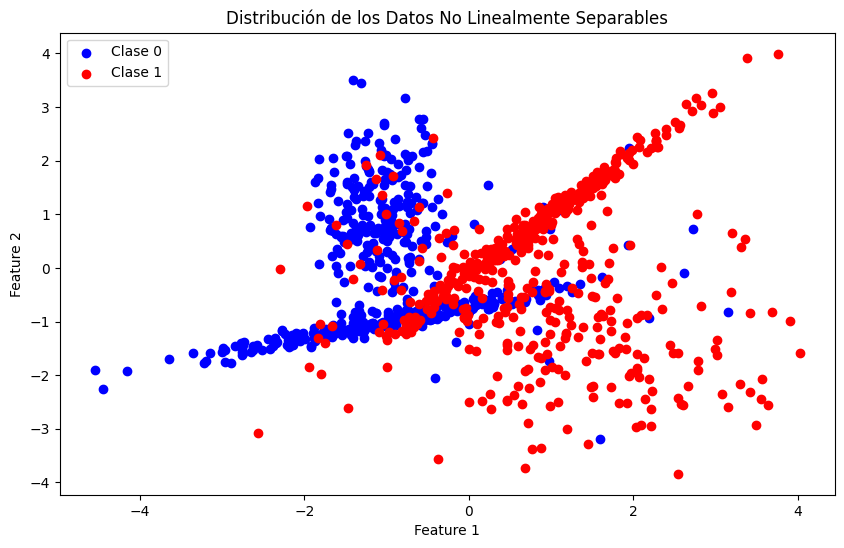

In [44]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,  
    n_classes=2,
    class_sep=1.0,          
    flip_y=0.1,            
    random_state=42
)

# Visualizar los datos
plt.figure(figsize=(10,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
plt.title('Distribución de los Datos No Linealmente Separables')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


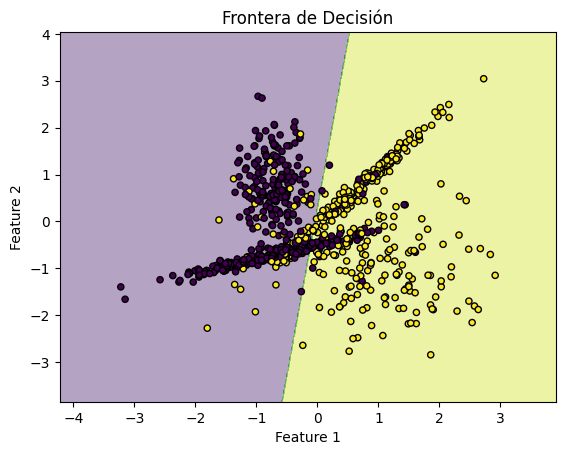

In [45]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Añadir término de intercepción (bias)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Instanciar y entrenar modelo
model = LogisticRegression(learning_rate=0.1, n_iterations=3000)
model.fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, model)

- En la original: Los datos seguían un patrón lineal claro y estaban bien separados

- En la nueva: Los datos están más dispersos y forman múltiples clusters, con mayor solapamiento entre clases

- La línea recta ya no es capaz de separar adecuadamente las clases

- Se observan muchos más errores de clasificación (puntos morados en zona amarilla y viceversa)

- La exactitud del modelo será significativamente menor

- Habrá más falsos positivos y falsos negativos